#Regression Computational Notebook

Copyright 2024 Mykola Kozlenko

    https://orcid.org/0000-0002-2502-2447

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

Please cite this software in your publications if it helps your research.

M. Kozlenko, "Data Analysis and Modeling Framework by Mykola Kozlenko," Zenodo, Jan. 20, 2024, doi: 10.5281/zenodo.10540581

[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.10540581.svg)](https://doi.org/10.5281/zenodo.10540581)

#Imports

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

#from scipy.io import wavfile

from sklearn.datasets import make_regression

import missingno as msno

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.inspection import permutation_importance

from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import Ridge
import xgboost as xgb

#from sklearn.metrics import classification_report
from sklearn.metrics import explained_variance_score
import sklearn.metrics

import scipy
#from scipy.stats import norm
import statsmodels.api as sm
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import seaborn as sns

#from plotly.subplots import make_subplots
#import plotly.graph_objects as go

#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from IPython.display import clear_output, display
# clear_output(wait=True); display(x)

import sys

%load_ext tensorboard

%load_ext autoreload
%autoreload 2

In [2]:
print('python version', sys.version)

print('numpy version', np.version.version)
print('pandas version', pd.__version__)

print('tensor flow version', tf.__version__)

python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
numpy version 1.23.5
pandas version 1.5.3
tensor flow version 2.15.0


#Artificial Data Synthesis

In [3]:
X, y = make_regression(n_samples=10000, n_features=18, noise=1, random_state=42)

In [4]:
df = pd.DataFrame(X)
df['y'] = y

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,y
0,0.544438,0.182188,-0.058627,0.411213,0.587282,-0.230032,-0.325565,-0.618093,1.446322,-0.293027,0.075535,1.032108,-0.043100,0.414242,-2.127888,-0.205522,-0.116482,-0.393837,-175.887688
1,-1.085343,-0.288661,1.135236,-0.686336,-1.740642,-1.445446,0.419501,-2.004594,-0.374650,-2.128343,-0.128830,-0.242661,-0.683559,0.375049,0.332017,-0.467904,0.037970,-0.092586,-89.363585
2,0.597880,-0.876082,0.090567,0.314031,-0.234674,-0.321939,-0.298646,-1.322089,-1.748617,-0.874131,0.436090,0.408080,-1.513408,-2.311207,-0.472719,1.448917,-1.297125,-0.421228,-186.251628
3,0.248369,0.066892,0.012674,-0.347002,-0.508932,-1.094322,-0.391716,-0.039195,0.585814,-1.132476,0.745866,0.646604,-1.683238,0.224168,-2.096868,1.728913,-0.483707,-0.263094,-294.652789
4,-0.138782,0.267405,0.579764,-1.815220,-1.413692,0.785514,1.357304,-0.388504,-1.338627,0.992683,1.078027,0.084548,-2.950331,1.037700,0.539772,2.397170,-0.919380,-0.775992,-14.755493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.040683,0.428555,-0.196914,-2.334648,0.033070,-0.475885,0.426513,0.019804,0.158086,0.951108,-0.372023,-0.409982,-0.169836,0.684027,-0.646169,1.150654,-0.254507,-0.293875,-266.430619
9996,-0.273950,0.561665,0.430253,0.311867,0.070713,-2.048145,-0.314642,0.848847,1.403121,-0.914481,-1.041489,0.237484,0.900583,-0.295433,0.182096,0.274129,0.853663,-0.068592,67.629618
9997,1.211428,-0.505447,-0.529768,0.804856,-0.510684,0.779131,-0.832477,-0.510291,-0.850198,-0.179630,-1.577228,0.177830,0.095350,-1.638246,-1.477164,-0.259597,1.102692,0.871724,-96.344909
9998,0.568983,1.628397,0.963879,2.210523,-0.379128,2.579709,-0.557492,-0.129821,1.639117,-0.088282,-0.803675,-0.147002,-1.369803,1.677701,-0.185288,-0.553588,0.043811,-0.203580,290.545780


#Data Cleaning. Outliers detection and removing

In [6]:
clf = IsolationForest(random_state=0).fit(X)
outliers = clf.predict(X)

In [7]:
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [8]:
df['outliers'] = outliers

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,y,outliers
0,0.544438,0.182188,-0.058627,0.411213,0.587282,-0.230032,-0.325565,-0.618093,1.446322,-0.293027,0.075535,1.032108,-0.043100,0.414242,-2.127888,-0.205522,-0.116482,-0.393837,-175.887688,1
1,-1.085343,-0.288661,1.135236,-0.686336,-1.740642,-1.445446,0.419501,-2.004594,-0.374650,-2.128343,-0.128830,-0.242661,-0.683559,0.375049,0.332017,-0.467904,0.037970,-0.092586,-89.363585,1
2,0.597880,-0.876082,0.090567,0.314031,-0.234674,-0.321939,-0.298646,-1.322089,-1.748617,-0.874131,0.436090,0.408080,-1.513408,-2.311207,-0.472719,1.448917,-1.297125,-0.421228,-186.251628,1
3,0.248369,0.066892,0.012674,-0.347002,-0.508932,-1.094322,-0.391716,-0.039195,0.585814,-1.132476,0.745866,0.646604,-1.683238,0.224168,-2.096868,1.728913,-0.483707,-0.263094,-294.652789,1
4,-0.138782,0.267405,0.579764,-1.815220,-1.413692,0.785514,1.357304,-0.388504,-1.338627,0.992683,1.078027,0.084548,-2.950331,1.037700,0.539772,2.397170,-0.919380,-0.775992,-14.755493,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.040683,0.428555,-0.196914,-2.334648,0.033070,-0.475885,0.426513,0.019804,0.158086,0.951108,-0.372023,-0.409982,-0.169836,0.684027,-0.646169,1.150654,-0.254507,-0.293875,-266.430619,1
9996,-0.273950,0.561665,0.430253,0.311867,0.070713,-2.048145,-0.314642,0.848847,1.403121,-0.914481,-1.041489,0.237484,0.900583,-0.295433,0.182096,0.274129,0.853663,-0.068592,67.629618,1
9997,1.211428,-0.505447,-0.529768,0.804856,-0.510684,0.779131,-0.832477,-0.510291,-0.850198,-0.179630,-1.577228,0.177830,0.095350,-1.638246,-1.477164,-0.259597,1.102692,0.871724,-96.344909,1
9998,0.568983,1.628397,0.963879,2.210523,-0.379128,2.579709,-0.557492,-0.129821,1.639117,-0.088282,-0.803675,-0.147002,-1.369803,1.677701,-0.185288,-0.553588,0.043811,-0.203580,290.545780,1


In [10]:
df['outliers'].value_counts()

 1    9768
-1     232
Name: outliers, dtype: int64

In [11]:
df = df.loc[df['outliers'] == 1]

In [12]:
df = df.drop(columns=['outliers'])

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,y
0,0.544438,0.182188,-0.058627,0.411213,0.587282,-0.230032,-0.325565,-0.618093,1.446322,-0.293027,0.075535,1.032108,-0.043100,0.414242,-2.127888,-0.205522,-0.116482,-0.393837,-175.887688
1,-1.085343,-0.288661,1.135236,-0.686336,-1.740642,-1.445446,0.419501,-2.004594,-0.374650,-2.128343,-0.128830,-0.242661,-0.683559,0.375049,0.332017,-0.467904,0.037970,-0.092586,-89.363585
2,0.597880,-0.876082,0.090567,0.314031,-0.234674,-0.321939,-0.298646,-1.322089,-1.748617,-0.874131,0.436090,0.408080,-1.513408,-2.311207,-0.472719,1.448917,-1.297125,-0.421228,-186.251628
3,0.248369,0.066892,0.012674,-0.347002,-0.508932,-1.094322,-0.391716,-0.039195,0.585814,-1.132476,0.745866,0.646604,-1.683238,0.224168,-2.096868,1.728913,-0.483707,-0.263094,-294.652789
4,-0.138782,0.267405,0.579764,-1.815220,-1.413692,0.785514,1.357304,-0.388504,-1.338627,0.992683,1.078027,0.084548,-2.950331,1.037700,0.539772,2.397170,-0.919380,-0.775992,-14.755493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.040683,0.428555,-0.196914,-2.334648,0.033070,-0.475885,0.426513,0.019804,0.158086,0.951108,-0.372023,-0.409982,-0.169836,0.684027,-0.646169,1.150654,-0.254507,-0.293875,-266.430619
9996,-0.273950,0.561665,0.430253,0.311867,0.070713,-2.048145,-0.314642,0.848847,1.403121,-0.914481,-1.041489,0.237484,0.900583,-0.295433,0.182096,0.274129,0.853663,-0.068592,67.629618
9997,1.211428,-0.505447,-0.529768,0.804856,-0.510684,0.779131,-0.832477,-0.510291,-0.850198,-0.179630,-1.577228,0.177830,0.095350,-1.638246,-1.477164,-0.259597,1.102692,0.871724,-96.344909
9998,0.568983,1.628397,0.963879,2.210523,-0.379128,2.579709,-0.557492,-0.129821,1.639117,-0.088282,-0.803675,-0.147002,-1.369803,1.677701,-0.185288,-0.553588,0.043811,-0.203580,290.545780


#Data Analysis

In [14]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,y
count,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000,9768.000000
mean,0.039451,-0.016074,0.006832,-0.000002,0.003248,-0.006841,-0.004822,-0.005476,-0.005823,-0.009968,0.001155,-0.009683,-0.007516,0.016193,0.007455,0.010316,-0.006917,0.009573,-0.576060
std,0.986647,0.980175,0.986148,0.994944,0.992636,0.994498,0.984646,0.977323,0.993260,0.996362,0.999231,0.981228,0.995201,0.994141,0.996807,0.995356,0.986655,0.981488,188.083548
min,-3.922400,-4.465604,-4.462969,-3.782616,-3.448043,-3.705150,-3.635200,-3.563593,-3.627208,-3.453354,-3.836656,-3.999332,-3.657301,-3.940008,-4.295391,-3.726141,-3.794637,-4.157734,-654.256622
25%,-0.633196,-0.684468,-0.649696,-0.666533,-0.669695,-0.673940,-0.683056,-0.663404,-0.679465,-0.684787,-0.666008,-0.680642,-0.687177,-0.652859,-0.664236,-0.663738,-0.667816,-0.655756,-127.689110
50%,0.033925,-0.004123,0.014283,0.007830,-0.004880,-0.008057,0.014275,0.000360,-0.007219,-0.005409,-0.010624,-0.008780,-0.019999,0.016067,-0.006430,0.009115,-0.005540,-0.000839,0.814131
75%,0.706623,0.651853,0.679757,0.659002,0.663330,0.663609,0.673146,0.662654,0.670312,0.673447,0.674322,0.649905,0.657417,0.689400,0.682395,0.678444,0.640636,0.672322,125.469626
max,3.829782,3.665229,3.377383,3.942331,3.446213,3.712795,3.976868,3.745379,3.852731,3.380614,3.707905,3.705243,3.561787,3.599812,4.202026,3.760155,3.732106,4.562115,732.875390


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9768 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9768 non-null   float64
 1   1       9768 non-null   float64
 2   2       9768 non-null   float64
 3   3       9768 non-null   float64
 4   4       9768 non-null   float64
 5   5       9768 non-null   float64
 6   6       9768 non-null   float64
 7   7       9768 non-null   float64
 8   8       9768 non-null   float64
 9   9       9768 non-null   float64
 10  10      9768 non-null   float64
 11  11      9768 non-null   float64
 12  12      9768 non-null   float64
 13  13      9768 non-null   float64
 14  14      9768 non-null   float64
 15  15      9768 non-null   float64
 16  16      9768 non-null   float64
 17  17      9768 non-null   float64
 18  y       9768 non-null   float64
dtypes: float64(19)
memory usage: 1.5 MB


<Axes: >

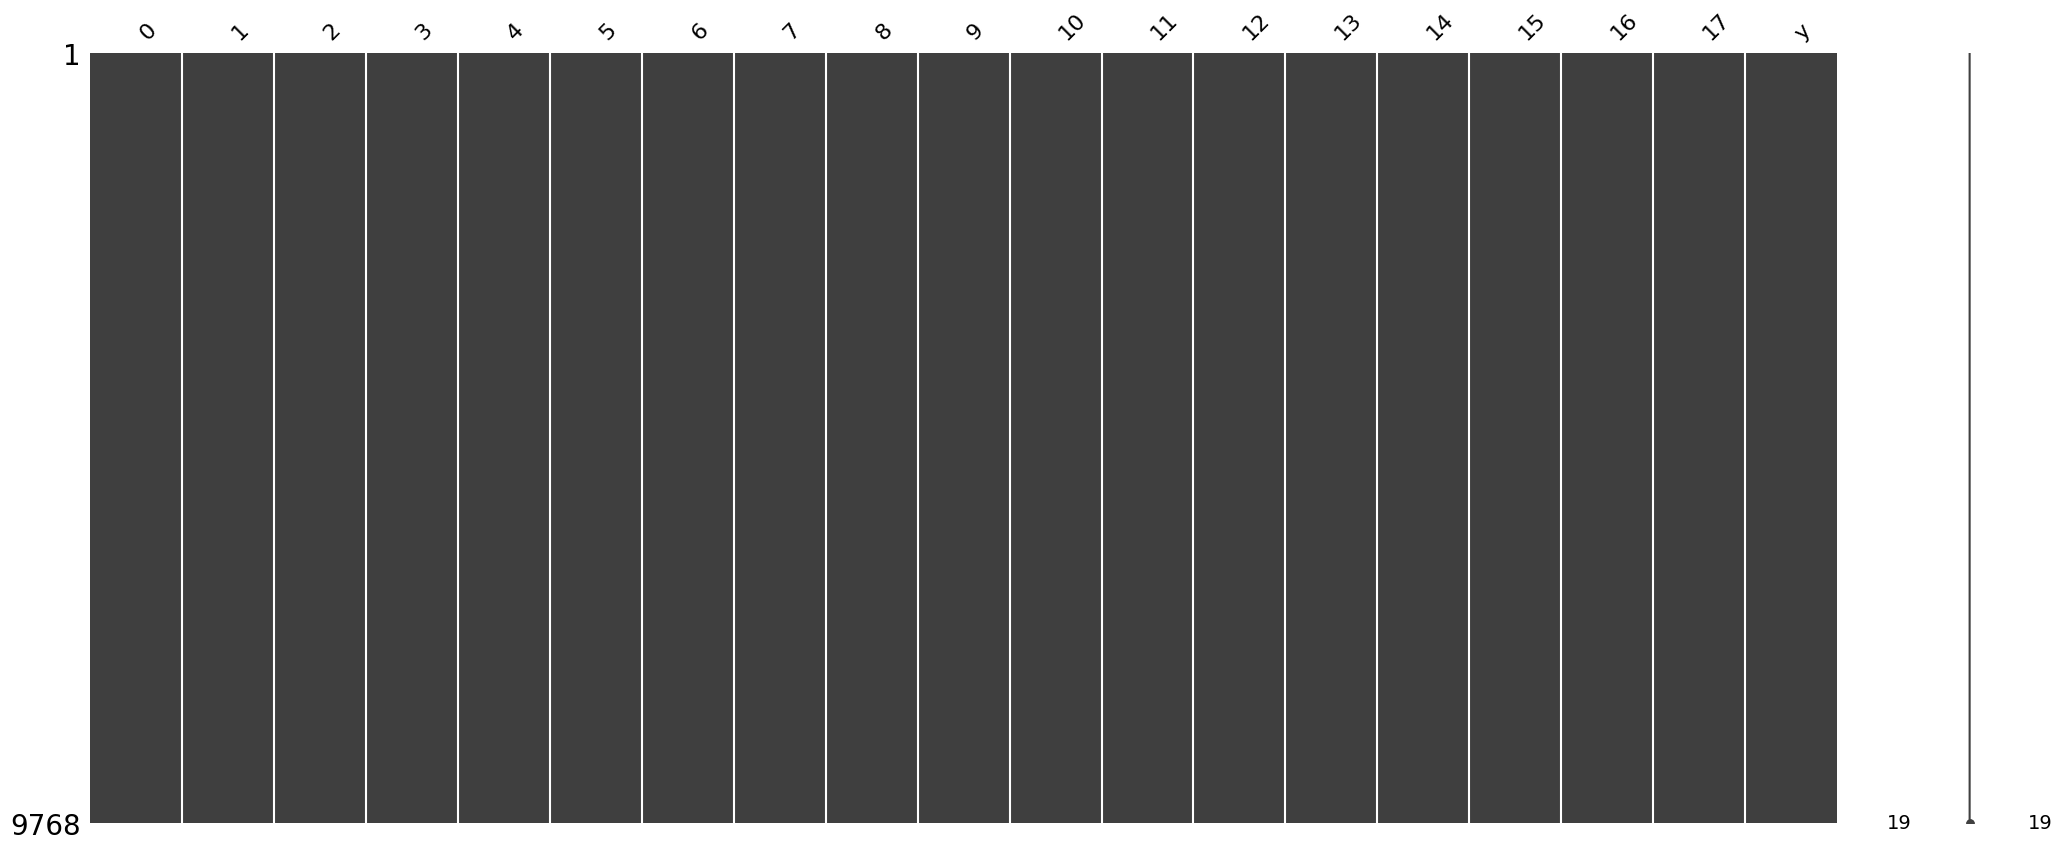

In [16]:
msno.matrix(df)

<Axes: >

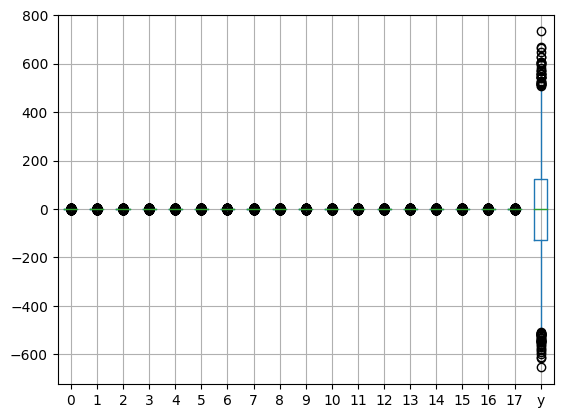

In [17]:
df.boxplot()

<Axes: >

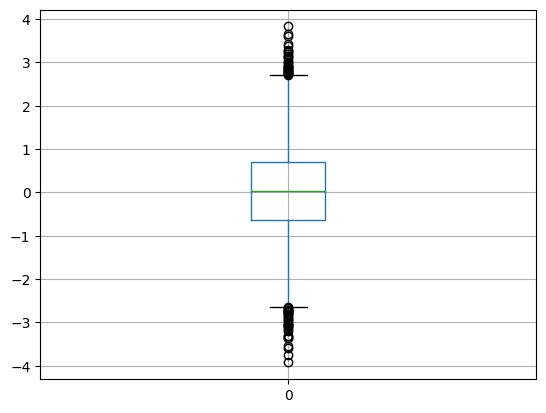

In [18]:
df.boxplot(column=[0])

<Axes: >

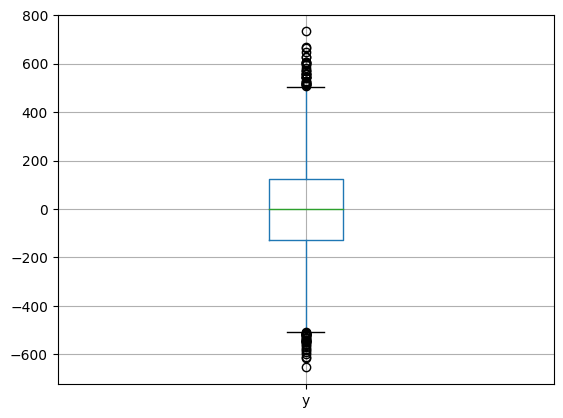

In [19]:
df.boxplot(column=['y'])

<ipython-input-20-0ab1b971178c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[0])


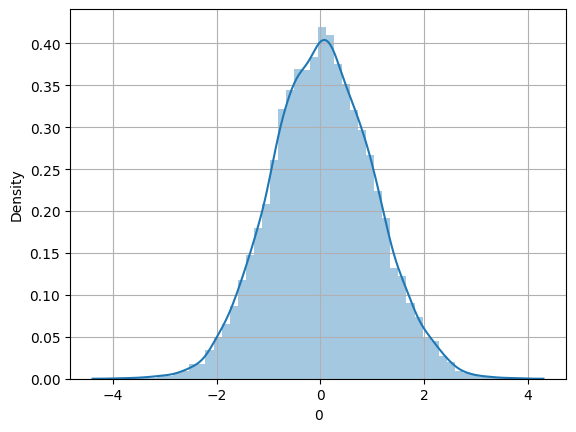

In [20]:
sns.distplot(df[0])
plt.grid()

<ipython-input-21-c73a104c17da>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['y'])


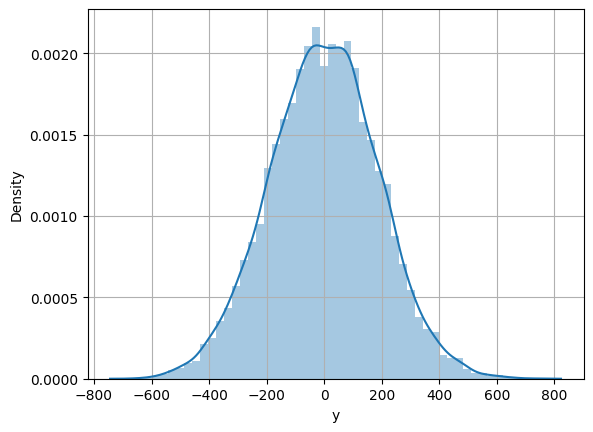

In [21]:
sns.distplot(df['y'])
plt.grid()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


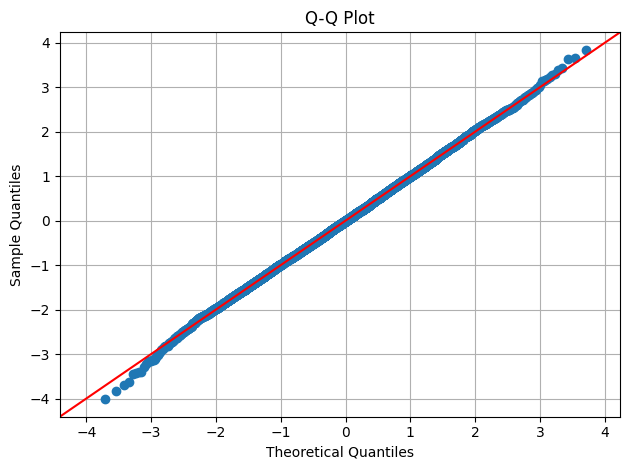

In [22]:
plt.style.use('default')

fig = sm.qqplot(df[0], fit=True, line="45", color='tab:blue')

plt.title('Q-Q Plot')

plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.tight_layout()

plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


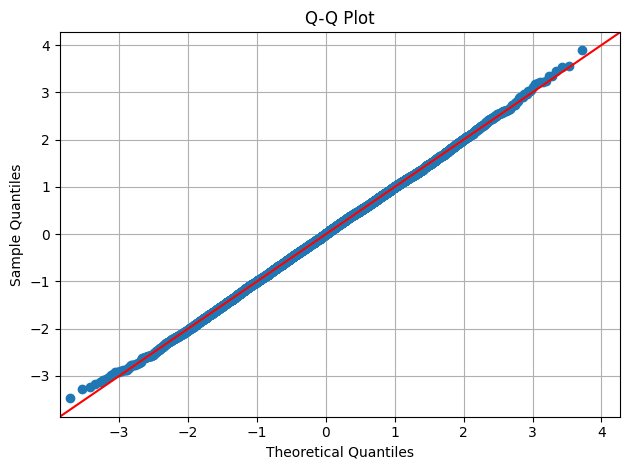

In [23]:
plt.style.use('default')

fig = sm.qqplot(df['y'], fit=True, line="45", color='tab:blue')

plt.title('Q-Q Plot')

plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.tight_layout()

plt.show()

####Normality testing

In [24]:
statistic, p_value = stats.shapiro(df[0])
print(p_value)

statistic, p_value = stats.normaltest(df[0])
print(p_value)

statistic, p_value = stats.jarque_bera(df[0])
print(p_value)

print(statistic, p_value)
ALPHA = 0.05
print("p_value = {:g}".format(p_value))

if p_value < ALPHA:  # null hypothesis: x comes from a normal distribution
    print("Reject H0")
else:
    print("Fail to reject H0")

0.5604172945022583
0.5521794777361548
0.5625851704104639
1.1504254846049347 0.5625851704104639
p_value = 0.562585
Fail to reject H0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [25]:
statistic, p_value = stats.shapiro(df['y'])
print(p_value)

statistic, p_value = stats.normaltest(df['y'])
print(p_value)

statistic, p_value = stats.jarque_bera(df['y'])
print(p_value)

print(statistic, p_value)
ALPHA = 0.05
print("p_value = {:g}".format(p_value))

if p_value < ALPHA:  # null hypothesis: x comes from a normal distribution
    print("Reject H0")
else:
    print("Fail to reject H0")

0.3757242262363434
0.9684867176460186
0.9659099737883737
0.06936928789715935 0.9659099737883737
p_value = 0.96591
Fail to reject H0


#Standartization / Normalization

In [26]:
X = df.drop(columns=['y']).copy()
y = df[['y']].copy()

In [27]:
X_scaled = StandardScaler().fit_transform(X)

#Dimensionality Reduction

In [28]:
pca = PCA(n_components=3)

In [29]:
pca.fit(X_scaled)

PCA(n_components=3)

In [30]:
X_pca_tranformed = pca.transform(X_scaled)

In [31]:
X_pca_tranformed = pd.DataFrame(X_pca_tranformed)

In [32]:
X_pca_tranformed = X_pca_tranformed.reset_index(drop=True)
y = y.reset_index(drop=True)

In [33]:
X = X_pca_tranformed.copy()
y = y.copy()

In [34]:
X

,0,1,2
0,-0.968895,-0.342700,0.326431
1,0.321492,-0.752864,0.312237
2,-0.956555,0.943696,1.017084
3,-0.848589,0.364420,0.482740
4,0.769663,-0.161388,0.583783
...,...,...,...
9763,0.053228,-0.004843,-0.129989
9764,-0.376344,0.856266,0.198192
9765,-0.929284,0.876161,-0.133128
9766,1.038897,-0.755139,-0.648522


In [35]:
y

,y
0,-175.887688
1,-89.363585
2,-186.251628
3,-294.652789
4,-14.755493
...,...
9763,-266.430619
9764,67.629618
9765,-96.344909
9766,290.545780


In [36]:
X = X.rename(columns={0: 'feature_0', 1: 'feature_1', 2: 'feature_2'})

In [37]:
df = pd.concat([X, y], axis=1, ignore_index=True, sort=False)

In [38]:
df

,0,1,2,3
0,-0.968895,-0.342700,0.326431,-175.887688
1,0.321492,-0.752864,0.312237,-89.363585
2,-0.956555,0.943696,1.017084,-186.251628
3,-0.848589,0.364420,0.482740,-294.652789
4,0.769663,-0.161388,0.583783,-14.755493
...,...,...,...,...
9763,0.053228,-0.004843,-0.129989,-266.430619
9764,-0.376344,0.856266,0.198192,67.629618
9765,-0.929284,0.876161,-0.133128,-96.344909
9766,1.038897,-0.755139,-0.648522,290.545780


In [39]:
df = df.rename(columns={0: 'feature_0', 1: 'feature_1', 2: 'feature_2', 3: 'y'})

In [40]:
df

,feature_0,feature_1,feature_2,y
0,-0.968895,-0.342700,0.326431,-175.887688
1,0.321492,-0.752864,0.312237,-89.363585
2,-0.956555,0.943696,1.017084,-186.251628
3,-0.848589,0.364420,0.482740,-294.652789
4,0.769663,-0.161388,0.583783,-14.755493
...,...,...,...,...
9763,0.053228,-0.004843,-0.129989,-266.430619
9764,-0.376344,0.856266,0.198192,67.629618
9765,-0.929284,0.876161,-0.133128,-96.344909
9766,1.038897,-0.755139,-0.648522,290.545780


#Feature selection / Feature engineering

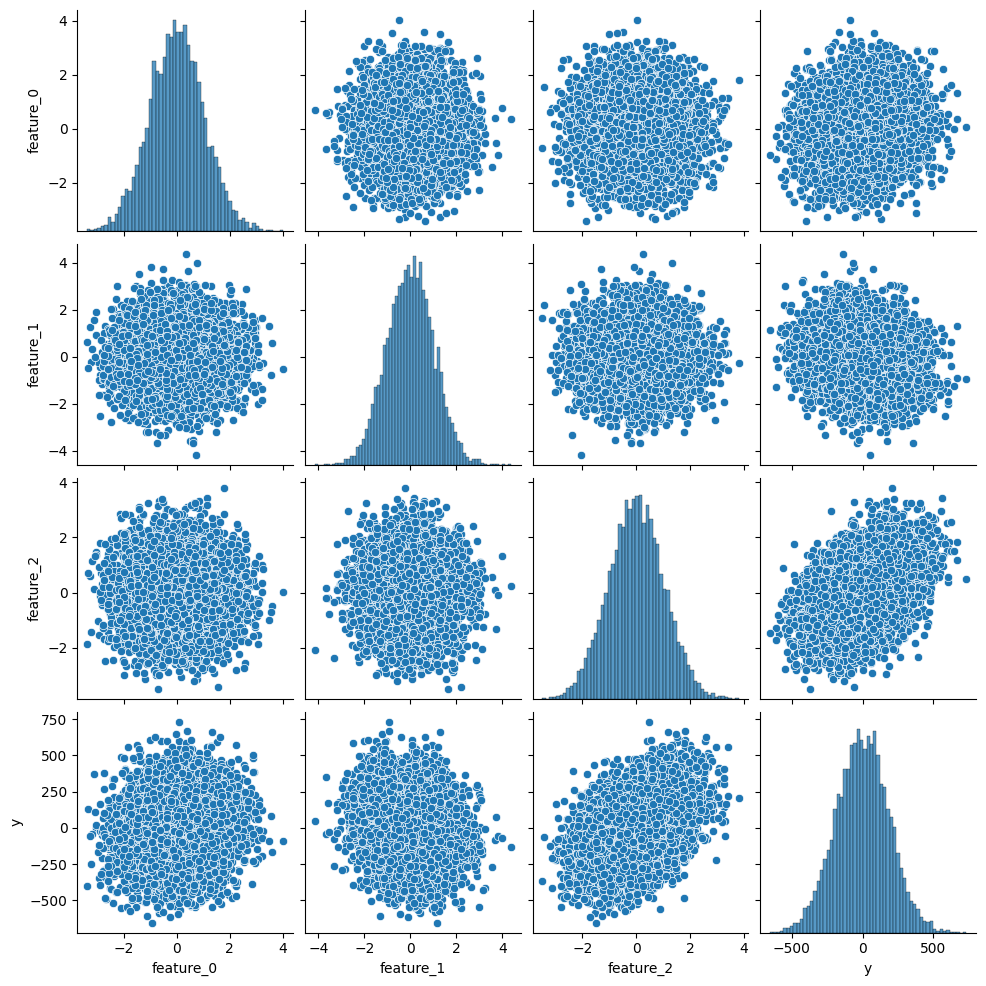

In [41]:
sns.pairplot(df)

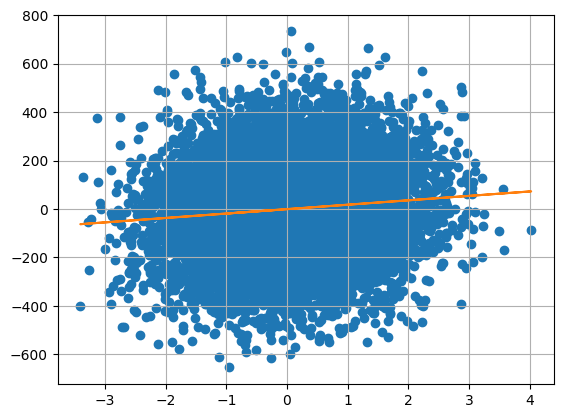

In [42]:
x_plot = df['feature_0']
y_plot = df['y']

plt.scatter(x_plot, y_plot)
m, b = np.polyfit(x_plot, y_plot, 1)
plt.plot(x_plot, m * x_plot + b, color='tab:orange')
plt.grid()

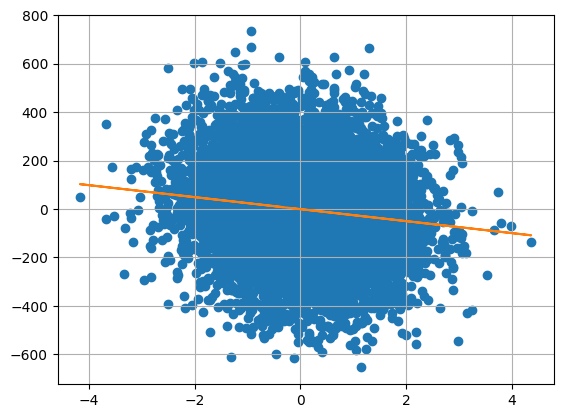

In [43]:
x_plot = df['feature_1']
y_plot = df['y']

plt.scatter(x_plot, y_plot)
m, b = np.polyfit(x_plot, y_plot, 1)
plt.plot(x_plot, m * x_plot + b, color='tab:orange')
plt.grid()

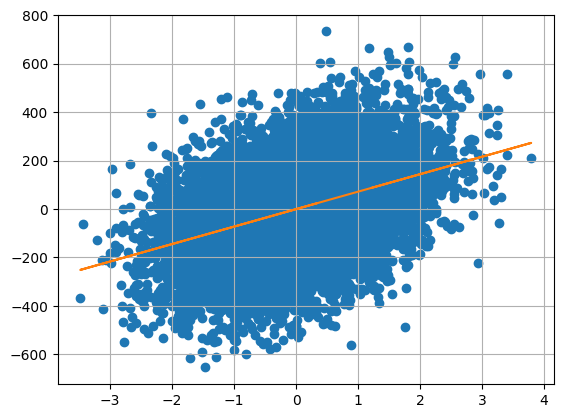

In [44]:
x_plot = df['feature_2']
y_plot = df['y']

plt.scatter(x_plot, y_plot)
m, b = np.polyfit(x_plot, y_plot, 1)
plt.plot(x_plot, m * x_plot + b, color='tab:orange')
plt.grid()

In [45]:
model = RandomForestRegressor()
model.fit(X, y)
print(model.feature_importances_)

model.score(X, y)

<ipython-input-45-b9d04eb820e5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


[0.28143783 0.29327702 0.42528515]


0.8728031438491549

In [46]:
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X, y)
print(fit.scores_)

[  97.51319747  179.20120112 1752.77263812]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
reg = Ridge(alpha=1e-2).fit(X, y)
print(reg.score(X, y))

r = permutation_importance(reg, X, y,
                                n_repeats=10,
                                random_state=0)

print(r.importances_mean)
print(r.importances_std)

0.18000516973973646
[0.01896689 0.03717155 0.30698547]
[0.0012804  0.00217708 0.00927591]


In [48]:
reg = xgb.XGBRegressor(
    tree_method="hist",
)

reg.fit(X, y)
print(reg.feature_importances_)

[0.22915867 0.25030804 0.5205333 ]


In [49]:
corr_mat = df.corr()
corr_mat

,feature_0,feature_1,feature_2,y
feature_0,1.000000,-0.000124,0.000330,0.099430
feature_1,-0.000124,1.000000,-0.000360,-0.134234
feature_2,0.000330,-0.000360,1.000000,0.390085
y,0.099430,-0.134234,0.390085,1.000000


<Axes: >

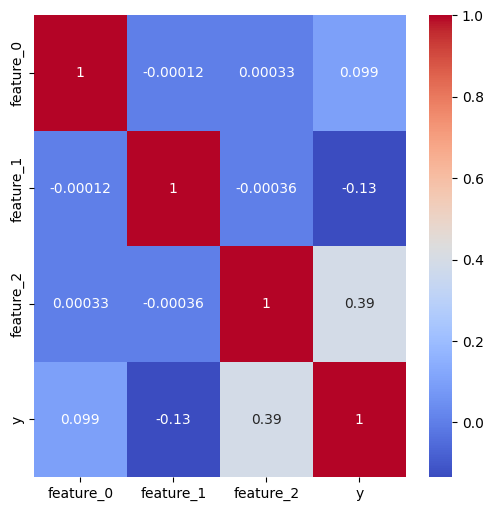

In [50]:
plt.figure(figsize=(6, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', )

In [51]:
f_statistic, p_values = f_regression(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
p_values

array([6.84707107e-23, 1.64618896e-40, 0.00000000e+00])

In [53]:
mutual_info_regression(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.00059338, 0.01541337, 0.08778591])

#Modeling

##Training

In [54]:
seed = 42
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [55]:
X_train

,feature_0,feature_1,feature_2
5762,-1.432295,-0.206658,1.468749
5173,0.120483,0.303768,-0.108780
2577,-0.568027,0.854206,-0.389140
1632,-1.266284,-1.368780,-0.545502
4588,0.126436,-0.492778,0.864895
...,...,...,...
5734,-1.841382,1.575119,-1.201545
5191,-0.281152,-1.342905,-0.210382
5390,-0.521468,1.419116,-0.273175
860,0.032207,-1.147599,0.209755


In [56]:
X_train.shape

(6544, 3)

In [57]:
y_train

,y
5762,86.741578
5173,-196.640084
2577,-200.510615
1632,-135.095952
4588,36.182339
...,...
5734,-134.618427
5191,-110.997579
5390,221.202307
860,186.909300


In [58]:
y_train.shape

(6544, 1)

In [59]:
reg = linear_model.LinearRegression()

In [60]:
reg.fit(X_train, y_train)

LinearRegression()

##Inference

In [61]:
y_pred = reg.predict(X_test)

##Evaluation

In [62]:
y_pred_2 = np.array(y_pred).ravel()

In [63]:
y_test_2 = np.array(y_test).ravel()

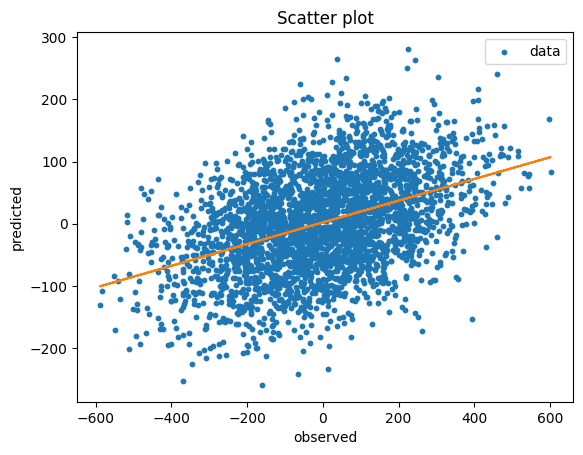

In [64]:
plt.scatter(y_test_2, y_pred_2, s=10, color='tab:blue', label= 'data')
#plt.plot(y_pred, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label)

m, b = np.polyfit(y_test_2, y_pred, 1)
plt.plot(y_test, m * y_test_2 + b, color='tab:orange')

plt.grid()
plt.title('Scatter plot')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.grid()
plt.show()

In [65]:
def evaluate(y_true, y_pred):

    r2 = sklearn.metrics.r2_score(y_test, y_pred)
    explained_variance = sklearn.metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error = sklearn.metrics.mean_absolute_error(y_test, y_pred)
    max_error = sklearn.metrics.max_error(y_test, y_pred)
    mean_squared_error = sklearn.metrics.mean_squared_error(y_test, y_pred)

    print('r2 = ' + str(r2))
    print('explained_variance = ' + str(explained_variance))
    print('mean_absolute_error = ' + str(mean_absolute_error))
    print('max_error = ' + str(max_error))
    print('mean_squared_error = ' + str(mean_squared_error))
    print('root_mean_squared_error = ' + str(np.sqrt(mean_squared_error)))


In [66]:
evaluate(y_test, y_pred)

r2 = 0.17018902323395058
explained_variance = 0.17180307788079696
mean_absolute_error = 137.1243376062864
max_error = 548.2177676203614
mean_squared_error = 29380.714808705012
root_mean_squared_error = 171.408036009707
